# **Importing the dependencies**

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# **Data Collection & Processing**


In [352]:
# load the data from csv file to pandas dataframe
loan_data = pd.read_csv('loan_approval_dataset.csv')

In [353]:
# printing the first 5 rows of the dataframe
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [354]:
loan_data.shape

(4269, 13)

In [355]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [356]:
loan_data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# **Data Analysis**

In [357]:
# getting some statistical measures about the data
loan_data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [358]:
# finding the no. of people loan received and not received
loan_data[' loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64

In [359]:
print(loan_data.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [360]:
# label encoding
loan_data.replace({" loan_data.head()":{'Rejected':0,'Approved':1}}, inplace=True)

In [361]:
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [362]:
loan_data[' no_of_dependents'].replace('3+', 3, inplace=True)

# **Data Visualization**

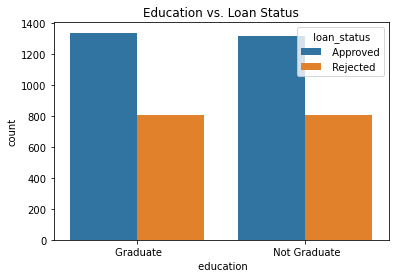

In [363]:
sns.countplot(x=' education', hue=' loan_status', data= loan_data)
plt.title('Education vs. Loan Status')
plt.show()

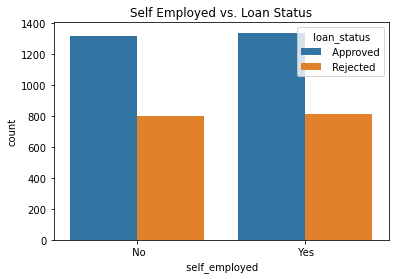

In [364]:
# marital status & loan status
sns.countplot(x=' self_employed', hue=' loan_status', data = loan_data)
plt.title('Self Employed vs. Loan Status')
plt.show()

In [365]:
# convert categorical columns to numerical values
loan_data.replace({' self_employed':{' No':0, ' Yes':1}, ' education':{' Not Graduate':0, ' Graduate':1}, ' loan_status':{' Approved':1, ' Rejected':0}}, inplace=True)

# print(loan_data[' education'].unique())


In [366]:
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [367]:
# Separating the data and label
X = loan_data.drop(columns=['loan_id',' loan_status'], axis=1)
Y = loan_data[' loan_status']

In [368]:
print(X)
print(Y)

       no_of_dependents   education   self_employed   income_annum  \
0                     2           1               0        9600000   
1                     0           0               1        4100000   
2                     3           1               0        9100000   
3                     3           1               0        8200000   
4                     5           0               1        9800000   
...                 ...         ...             ...            ...   
4264                  5           1               1        1000000   
4265                  0           0               1        3300000   
4266                  2           0               0        6500000   
4267                  1           0               0        4100000   
4268                  1           1               0        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1        

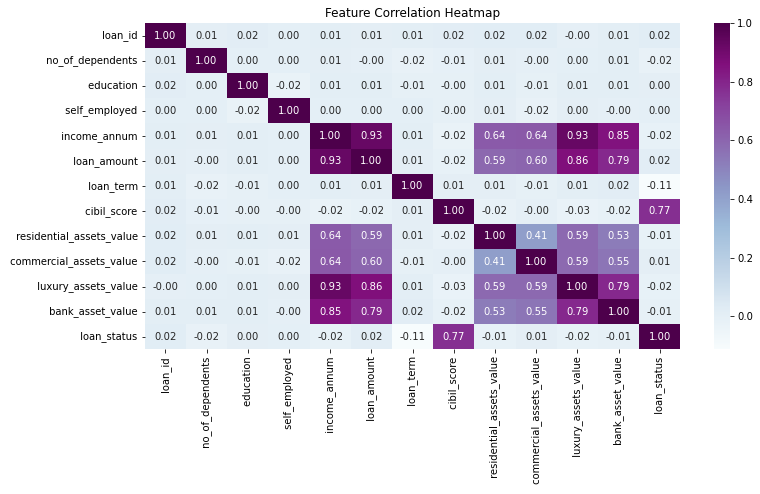

In [369]:
# Heap Map

plt.figure(figsize=(12, 6))
sns.heatmap(loan_data.corr(), annot=True, cmap='BuPu', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

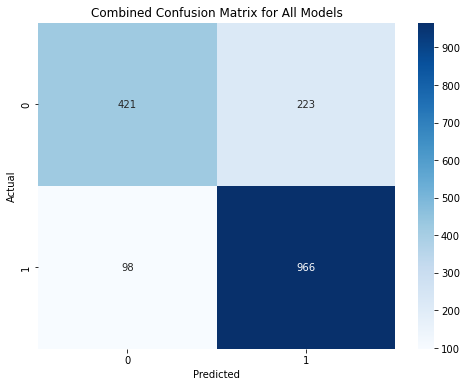

In [370]:
# Confusion Matrix Graph

combined_confusion = np.zeros((2, 2), dtype=int)  # Ensure integer values

# Inside the loop where you evaluate your models
for model in algorithms:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(Y_test, y_pred)
    combined_confusion += confusion

# Create a single heatmap for the combined confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(combined_confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Combined Confusion Matrix for All Models")
plt.show()

# **Train Test Split**

In [371]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify= Y, random_state= 2)

**Training the model:**

In [372]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=1)
rfmodel = RandomForestClassifier()

In [373]:
for model in algorithms:
    # Train the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    # Print or store the metrics for comparison
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print('-----------------')


Model: KNeighborsClassifier
Accuracy: 0.5761124121779859
Precision: 0.6384364820846905
Recall: 0.7368421052631579
F1-Score: 0.6841186736474694
-----------------
Model: LogisticRegression
Accuracy: 0.711943793911007
Precision: 0.7072463768115942
Recall: 0.9172932330827067
F1-Score: 0.7986906710310966
-----------------
Model: DecisionTreeClassifier
Accuracy: 0.9718969555035128
Precision: 0.9738805970149254
Recall: 0.981203007518797
F1-Score: 0.9775280898876405
-----------------
Model: RandomForestClassifier
Accuracy: 0.9859484777517564
Precision: 0.9850746268656716
Recall: 0.9924812030075187
F1-Score: 0.9887640449438201
-----------------
